In [1]:
import os
import shutil
import pickle
import navis
import numpy as np
import pandas as pd
from PIL import Image,ImageOps,ImageDraw, ImageFont
import nrrd# Some sample numpy
import plotly
import sys,os
sys.path.append('D:/code/neuron-vis/neuronvis/neuronVis')

import IONData as IONData
import SwcLoader as SwcLoader
sys.path.append('D://code//neuron-vis/core/code')

import GenerateterminalMatrix as GenerateterminalMatrix
import matplotlib.pyplot as plt
from collections import Counter
import HierarchicalClustering as HierarchicalClustering
from Plot import tSNE_Plot as tSNE_Plot
from Plot import Clustering_Plot as Clustering_Plot

from Plot import Soma_Dotplot as Soma_Dotplot
from sklearn import manifold, datasets
from scipy.cluster import hierarchy
import seaborn as sns
%matplotlib inline
iondata=IONData.IONData()
tree=SwcLoader.NeuronTree()
generatematrix=GenerateterminalMatrix.GenerateterminalMatrix()
clustering=HierarchicalClustering.HierarchicalClustering()
tsneplot=tSNE_Plot()
clusteringplot=Clustering_Plot()
 

In [ ]:
# f=open('D:\data\PF-fMOST\WT_fmost_analyzing/neuronlist.txt')
# line = f.readline().strip() 
# txt=[]
# txt.append(line)
# while line:  
#    line = f.readline().strip()  
#    txt.append(line)
# f.close()  
# print(txt)
# neuronlist_WT=txt
# neuronlist_WT=[x for x in neuronlist_WT if not x=='']
# f=open('D:\data\PF-fMOST/total/143_crelistneuronlist.txt')
# line = f.readline().strip() 
# txt=[]
# txt.append(line)
# while line:  
#    line = f.readline().strip()  
#    txt.append(line)
# f.close()  
# print(txt)
# neuronlist_cre=txt
# neuronlist_cre=[x for x in neuronlist_cre if not x=='']
# neuronlist=neuronlist_WT+neuronlist_cre

['210661077.swc', '220240001.swc', '220240004.swc', '220240006.swc', '220240031.swc', '220240033.swc', '220240035.swc', '220240036.swc', '220241010.swc', '220241011.swc', '220241012.swc', '220241014.swc', '220241015.swc', '220241018.swc', '220241019.swc', '220241020.swc', '220241021.swc', '220241022.swc', '220241023.swc', '220241024.swc', '220241025.swc', '220241026.swc', '220241027.swc', '220241028.swc', '220241029.swc', '220241031.swc', '220241032.swc', '220241033.swc', '220241034.swc', '220241035.swc', '220241036.swc', '220241043.swc', '220241046.swc', '220241053.swc', '220241054.swc', '220241055.swc', '220241056.swc', '220241058.swc', '220241059.swc', '220241060.swc', '220241061.swc', '220241062.swc', '']
['221624012.swc', '221624013.swc', '221624040.swc', '221624044.swc', '221624045.swc', '221624046.swc', '221624047.swc', '221624048.swc', '221624050.swc', '221624051.swc', '221624053.swc', '221624054.swc', '221624084.swc', '221624085.swc', '221624097.swc', '221624169.swc', '2216241

In [ ]:
# import GenerateterminalMatrix as GenerateterminalMatrix
# generatematrix=GenerateterminalMatrix.GenerateterminalMatrix()
# generatematrix.generate_terminal_matrix(neuronlist,normalized=False,st_level=8,flip='left')
# neurondata_st8=generatematrix.terminaldata
# # terminal_tem=generatematrix.terminal_tem
# json_error=neurondata_st8.sum()[neurondata_st8.sum()==0]
# print('error in json',json_error)

In [ ]:
# #处理掉非基础脑区的信号，过低的噪音
# neurondata_st8=neurondata_st8.loc[~(neurondata_st8==0).all(axis=1)]
# region_st5_all=['Isocortex',
#          'OLF',
#          'HPF',
#          'CTXsp',
#          'STR',
#          'PAL',
#          'TH',
#          'HY',
#          'MB',
#          'P',
#          'MY',
#          'CBX',
#          'CBN']
 
# primary_region=[x for x in neurondata_st8.index if not x[:x.index('.')] in region_st5_all]
# neurondata_st8=neurondata_st8.loc[primary_region]
# # neurondata_st8=neurondata_st8.drop(index='PF.left')
# terminal_sum=neurondata_st8.sum()
# propotion_terminal=neurondata_st8.div(terminal_sum)

# region_tem=(neurondata_st8>0).sum(axis=1)
# region_tem=region_tem[region_tem>10].index.to_list()#排除掉出现少于10次的脑区
# neurondata_st8_screen=neurondata_st8.loc[region_tem]
# neurondata_st8_screen=neurondata_st8_screen[neurondata_st8_screen>5]#排除掉terminal 数少的
# propotion_terminal_log=neurondata_st8_screen.apply(np.log10)
# propotion_terminal_log=propotion_terminal_log.fillna(0)

In [ ]:
# neurondata_st8=neurondata_st8[neurondata_st8>5]
# neurondata_st8=neurondata_st8.fillna(0)
# def pick_cluster(propotion_data, target_area):
#     if len(target_area)>1:
#         aim_cluster=propotion_data.loc[:,(propotion_data.loc[target_area[0]]!=0)&(propotion_data.loc[target_area[1]]==0)]
#         return aim_cluster
#     elif len(target_area)==1:
#         aim_cluster=propotion_data.loc[:,(propotion_data.loc[target_area[0]]!=0)]
#         return aim_cluster
# target_area=['MOs.left','MOp.left']
# Mos_cluster=pick_cluster(propotion_data=neurondata_st8, target_area=target_area)
# Mos_neuronlist = list(Mos_cluster.columns.values)  
# target_area=['MOp.left']   
# Mop_cluster=pick_cluster(neurondata_st8,target_area)
# Mop_neuronlist = list(Mop_cluster.columns.values)



In [ ]:
# import Scene
# neuronlist_tem=Mop_neuronlist
# scene_tem=[{'sampleid': x[:6], 'name': x[6:]} for x in neuronlist_tem]
# Scene.createScene(scene_tem,'E:/NeuronView/data/scene/Mopcluster'+'.nv'+'',color='blue')
# neuronlist_tem=Mos_neuronlist
# scene_tem=[{'sampleid': x[:6], 'name': x[6:]} for x in neuronlist_tem]
# Scene.createScene(scene_tem,'E:/NeuronView/data/scene/Moscluster'+'.nv'+'',color='blue')

In [ ]:
import Scene
import pandas as pd
Mop_scene=Scene.scene2List("E:/NeuronView/data/scene/Mopcluster.nv")
Mop_scene=pd.DataFrame(Mop_scene)
Mop_neuronlist=list(Mop_scene['sampleid']+Mop_scene['name'])
Mos_scene=Scene.scene2List("E:/NeuronView/data/scene/Moscluster.nv")
Mos_scene=pd.DataFrame(Mos_scene)
Mos_neuronlist=list(Mos_scene['sampleid']+Mos_scene['name'])
calb_scene=Scene.scene2List("E:/neuroview/data/scene/genecalb1.nv")
calb_scene=pd.DataFrame(calb_scene)
calblist=list(calb_scene['sampleid']+calb_scene['name'])



In [4]:
neuronlist_MO=Mos_neuronlist+Mop_neuronlist
Mo_clusters=dict(zip(['Mos','Mop'],[Mos_neuronlist,Mop_neuronlist]))
calb_mo = list(set(calblist) & set(neuronlist_MO))
calb_mos = list(set(calblist) & set(Mos_neuronlist))
calb_mop = list(set(calblist) & set(Mop_neuronlist))

In [5]:
#获取各个神经元在不同脑区的terminal 数量
generatematrix=GenerateterminalMatrix.GenerateterminalMatrix()
generatematrix.generate_terminal_matrix(calb_mo,normalized=False,st_level=8,flip='left') # 神经元翻转到左侧统计，terminal 结果不进行标准化
neurondata_st8=generatematrix.terminaldata
# terminal_tem=generatematrix.terminal_tem
json_error=neurondata_st8.sum()[neurondata_st8.sum()==0]
print('error in json',json_error)

221612016.swc
221624054.swc
221624012.swc
221624047.swc
221624179.swc
221612032.swc
221612020.swc
221624040.swc
221612006.swc
221612080.swc
221612007.swc
221612046.swc
221612019.swc
221624045.swc
221612018.swc
221612033.swc
221624044.swc
221624097.swc
221612076.swc
221612079.swc
221612077.swc
221612004.swc
221612078.swc
221624050.swc
221624180.swc
221624084.swc
221612008.swc
221624048.swc
221612062.swc
error in json Series([], dtype: int64)


In [12]:
#处理掉非基础脑区的信号，过低的噪音
neurondata_st8=neurondata_st8.loc[~(neurondata_st8==0).all(axis=1)]
region_st5_all=['Isocortex',
         'OLF',
         'HPF',
         'CTXsp',
         'STR',
         'PAL',
         'TH',
         'HY',
         'MB',
         'P',
         'MY',
         'CBX',
         'CBN']
 
primary_region=[x for x in neurondata_st8.index if not x[:x.index('.')] in region_st5_all]
neurondata_st8=neurondata_st8.loc[primary_region]
# neurondata_st8=neurondata_st8.drop(index='PF.left')
terminal_sum=neurondata_st8.sum()
propotion_terminal=neurondata_st8.div(terminal_sum)

region_tem=(neurondata_st8>0).sum(axis=1)
region_tem=region_tem[region_tem>10].index.to_list()#排除掉出现少于10次的脑区
neurondata_st8_screen=neurondata_st8.loc[region_tem]
neurondata_st8_screen=neurondata_st8_screen[neurondata_st8_screen>5]#排除掉terminal 数少的
propotion_terminal_log=neurondata_st8_screen.apply(np.log10)
propotion_terminal_log=propotion_terminal_log.fillna(0)


In [27]:
#挑选雷达图绘制脑区
region_draw=['AI.left',
         'MOs.left',
         'SSs.left',
         'MOp.left',
         'SSp.left',
         'ACA.left',
         'SI.left',
         'PL.left',
         'ACB.left',
         'CP.left',
         'SNr.left']
propotion_terminal_log=propotion_terminal_log.loc[region_draw]
target_area=['MOp.left']#,'MOp.left']      
def pick_cluster(propotion_data, target_area):
    aim_cluster=propotion_data.loc[:,(propotion_data.loc[target_area[0]]!=0)]#&(propotion_data.loc[target_area[1]]==0)]
    return aim_cluster
mop_cp_cluster=pick_cluster(propotion_data=propotion_terminal_log, target_area=target_area)  

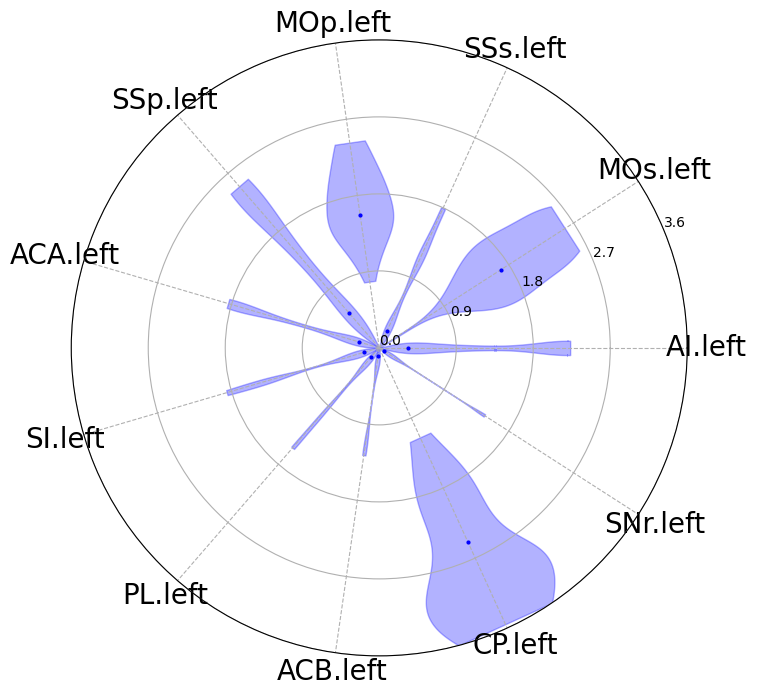

In [28]:
#绘图
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 示例数据：每个行名代表一个小提琴图

df =mop_cp_cluster
max_value = df.values.max()
# 设置极坐标
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# 获取行名和列标签
row_labels = df.index.values

# 计算角度
angles = np.linspace(0, 2 * np.pi, len(row_labels), endpoint=False).tolist()
angles += angles[:1]

violin_color= 'Blue'

# 绘制小提琴图
for i, row_label in enumerate(row_labels):
    values = df.loc[row_label].values
    angle = angles[i]
    vp=ax.violinplot([values], positions=[angle], widths=0.5, showmeans=False,showextrema=False)
# 设置小提琴图的颜色
    for pc in vp['bodies']:
        pc.set_facecolor(violin_color)
        pc.set_edgecolor(violin_color)
    
    mean_value = np.mean(values)
    ax.plot(angle, mean_value, 'o', markersize=2, color=violin_color)
# 设置标签和网格
ax.set_xticks(angles[:-1])
ax.set_xticklabels(row_labels,fontsize=20)
ax.xaxis.grid(True, linestyle='--')
# 设置径向刻度和标签
num_ticks = 5
tick_values = np.linspace(0, max_value, num_ticks)
ax.set_yticks(tick_values)
ax.set_yticklabels([f'{val:.1f}' for val in tick_values],fontsize=10)
ax.set_ylim(0, max_value)
plt.savefig('D:/Figure/25\Figure 4/mop_piechat.pdf')
plt.show()


In [8]:
def func_gaussian(x,center=0,sigma=1):
    return (1/(2*np.pi*sigma**2))*np.exp(-((x-center)**2)/(2*sigma**2))

PermissionError: [Errno 13] Permission denied: 'D:\\Figure/24\\paper/figure 4\\mo_ml.pdf'

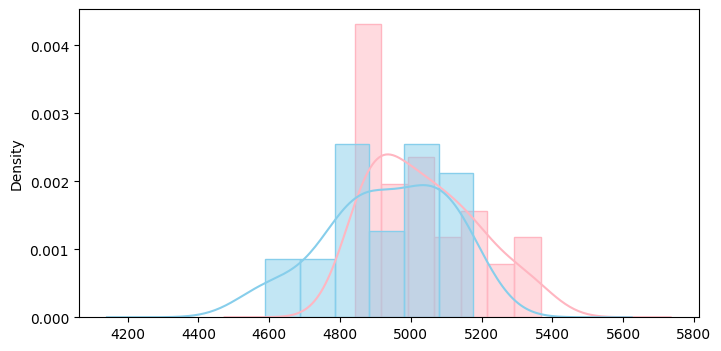

In [29]:

from sklearn.mixture import GaussianMixture
import seaborn as sns
combined_gmm = GaussianMixture(n_components=len(neuronlist_MO))
colors=['LightPink','skyblue']
plt.figure(figsize=(8, 4))
m=0
for i in Mo_clusters:
    point_ml=[]
    m=m+1
    for j in Mo_clusters[i]:
        somapoints=iondata.getNeuronPropertyByID(j[:6],j[6:])['somapoint']
        if somapoints[2]>5700:
            somapoints[2]=11400-somapoints[2]
        point_ml.append(somapoints[2])
    sns.histplot(point_ml, kde = True,edgecolor=colors[m-1],color=colors[m-1], kde_kws={'cut': 5},stat="density")
plt.savefig('D:\Figure/24\paper/figure 4\mo_ml.pdf')

       

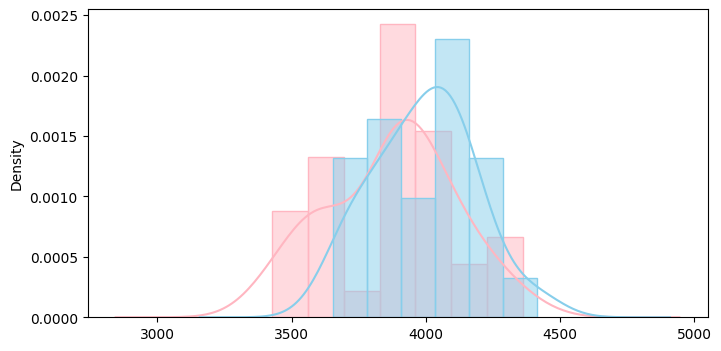

In [20]:
plt.figure(figsize=(8, 4))
m=0
for i in Mo_clusters:
    point_dv=[]
    m=m+1
    for j in Mo_clusters[i]:
        somapoints=iondata.getNeuronPropertyByID(j[:6],j[6:])['somapoint']
        if somapoints[2]>5700:
            somapoints[2]=11400-somapoints[2]
        point_dv.append(somapoints[1])
    sns.histplot(point_dv, kde = True,edgecolor=colors[m-1],color=colors[m-1], kde_kws={'cut': 5},stat="density")
plt.savefig('D:\Figure/24\paper/figure 4\mo_dv.pdf')


In [1]:
with open("SIproject.pkl", "rb") as file:
    SIprojectdata = pickle.load(file)
SIprojectdata=list(SIprojectdata)
SIMO_clusters=dict(zip(['SI','Mop'],[SIprojectdata,Mop_neuronlist]))

NameError: name 'pickle' is not defined

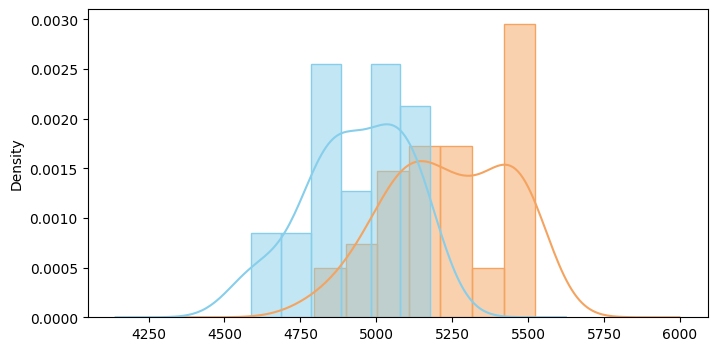

In [25]:

combined_gmm = GaussianMixture(n_components=len(neuronlist_MO))
colors=['SandyBrown','skyblue']
plt.figure(figsize=(8, 4))
m=0
for i in SIMO_clusters:
    point_ml=[]
    m=m+1
    for j in SIMO_clusters[i]:
        somapoints=iondata.getNeuronPropertyByID(j[:6],j[6:])['somapoint']
        if somapoints[2]>5700:
            somapoints[2]=11400-somapoints[2]
        point_ml.append(somapoints[2])
    sns.histplot(point_ml, kde = True,edgecolor=colors[m-1],color=colors[m-1], kde_kws={'cut': 5},stat="density")
plt.savefig('D:\Figure/24\paper/figure 4\m1_SIml.pdf')


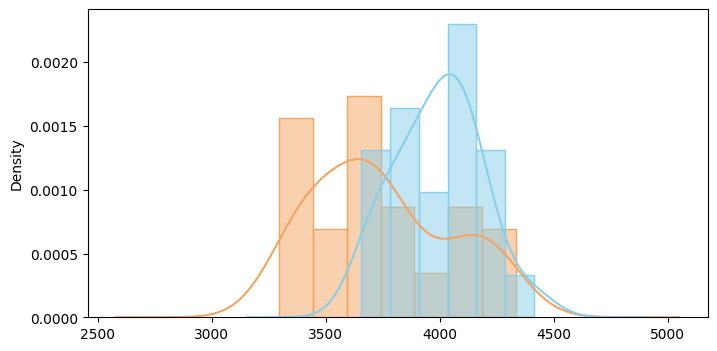

In [26]:
plt.figure(figsize=(8, 4))
m=0
for i in SIMO_clusters:
    point_dv=[]
    m=m+1
    for j in SIMO_clusters[i]:
        somapoints=iondata.getNeuronPropertyByID(j[:6],j[6:])['somapoint']
        if somapoints[2]>5700:
            somapoints[2]=11400-somapoints[2]
        point_dv.append(somapoints[1])
    sns.histplot(point_dv, kde = True,edgecolor=colors[m-1],color=colors[m-1], kde_kws={'cut': 5},stat="density")
plt.savefig('D:\Figure/24\paper/figure 4\m1_SIdv.pdf')